Epoch 1/10
235/235 [==============================] - 7s 24ms/step - loss: 0.6955 - val_loss: 0.6955
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6953 - val_loss: 0.6953
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6951 - val_loss: 0.6951
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.6949 - val_loss: 0.6949
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 6/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.6944 - val_loss: 0.6944
Epoch 8/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 9/10
235/235 [==============================] - 6s 25ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


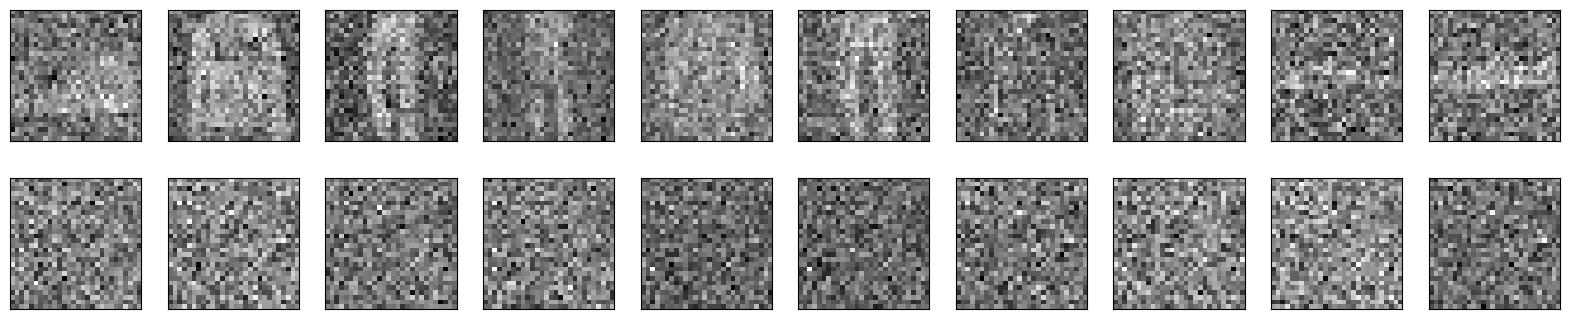

Epoch 1/10
235/235 [==============================] - 7s 25ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 2/10
235/235 [==============================] - 5s 19ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 8/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 9/10
235/235 [==============================] - 6s 24ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 10/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6925 - val_lo

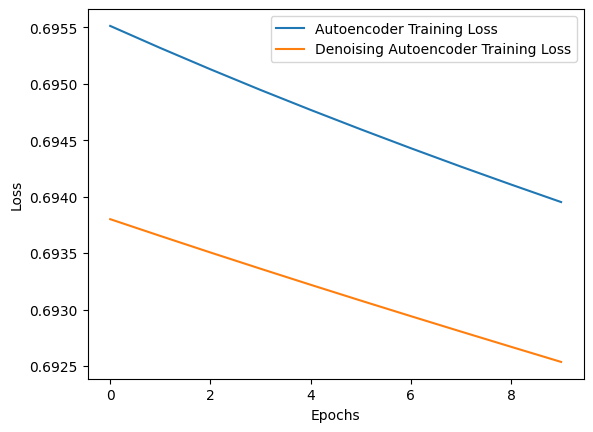

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

# Define the autoencoder
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))

# Visualize the test data before and after reconstruction
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising autoencoder
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history_denoising = denoising_autoencoder.fit(x_train_noisy, x_train,
                                              epochs=10,
                                              batch_size=256,
                                              shuffle=True,
                                              validation_data=(x_test_noisy, x_test_noisy))

# Plot the training loss
plt.plot(history.history['loss'], label='Autoencoder Training Loss')
plt.plot(history_denoising.history['loss'], label='Denoising Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
